In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
customer_data = pd.read_csv('maven_music_customers.csv')
Listining_history = pd.read_excel('maven_music_listening_history.xlsx')

In [6]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [7]:
Listining_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [8]:
customer_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 13.0 KB


In [9]:
Listining_history.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 46.1 KB


In [21]:
Audio_data  = pd.read_excel('maven_music_listening_history.xlsx', sheet_name=1)
Audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [22]:
Session_data = pd.read_excel('maven_music_listening_history.xlsx', sheet_name=2)
Session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


# Cleaning Data 

In [26]:
customer_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 13.0 KB


In [24]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [30]:
customer_data['Subscription Rate'].value_counts(dropna= False)

Subscription Rate
$2.99      17
$7.99       7
$9.99       5
$99.99      1
Name: count, dtype: int64

# Converting Data types

In [39]:

customer_data['Member Since'] = pd.to_datetime(customer_data['Subscription Plan'],errors= 'coerce')
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'],errors = 'coerce')
customer_data['Subscription Rate'] = pd.to_numeric(customer_data['Subscription Rate'].str.strip('$'))    

C:\Users\KishoreKiran\AppData\Local\Temp\ipykernel_24668\1814864551.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Member Since'] = pd.to_datetime(customer_data['Subscription Plan'],errors= 'coerce')
C:\Users\KishoreKiran\AppData\Local\Temp\ipykernel_24668\1814864551.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'],errors = 'coerce')


In [43]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [48]:
customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'], errors= 'coerce')
customer_data['Member Since']

0    2023-03-13
1    2023-03-13
2    2023-03-13
3    2023-03-20
4    2023-03-20
5    2023-03-20
6    2023-03-21
7    2023-03-22
8    2023-03-28
9    2023-03-28
10   2023-03-28
11   2023-03-28
12   2023-03-29
13   2023-04-01
14   2023-04-05
15   2023-04-06
16   2023-04-08
17   2023-04-09
18   2023-04-16
19   2023-04-16
20   2023-04-24
21   2023-05-01
22   2023-05-01
23   2023-05-01
24   2023-05-07
25   2023-05-08
26   2023-05-08
27   2023-05-15
28   2023-05-16
29   2023-05-16
Name: Member Since, dtype: datetime64[ns]

In [50]:
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'],errors = 'coerce')

C:\Users\KishoreKiran\AppData\Local\Temp\ipykernel_24668\1070034438.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'],errors = 'coerce')


In [51]:
customer_data['Subscription Rate'] = pd.to_numeric(customer_data['Subscription Rate'].str.strip('$')) 

In [52]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [54]:
customer_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 8.7 KB


In [57]:
customer_data['Discount?'].value_counts(dropna= False)

Discount?
NaN    23
Yes     7
Name: count, dtype: int64

In [59]:
customer_data['Discount?'].fillna('No', inplace= True)

In [60]:
customer_data['Discount?'].value_counts(dropna= False)

Discount?
No     23
Yes     7
Name: count, dtype: int64

In [61]:
customer_data['Cancellation Date'].value_counts(dropna= False)

Cancellation Date
NaT           17
2023-06-01     6
2023-06-02     5
2023-06-03     2
Name: count, dtype: int64

In [62]:
customer_data['Subscription Plan'].value_counts(dropna= False)

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
NaN                  5
Name: count, dtype: int64

In [63]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [64]:
customer_data['Subscription Plan'].fillna('No Plan', inplace= True)

In [65]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [66]:
customer_data['Subscription Plan'].value_counts(dropna= False)

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
No Plan              5
Name: count, dtype: int64

In [77]:
customer_data['Subscription Plan'] = customer_data['Subscription Plan'].str.strip('(Ads)').str.strip(' (No')

In [78]:
customer_data['Subscription Plan'].value_counts(dropna= False)

Subscription Plan
Premium    13
Basic      12
Plan        5
Name: count, dtype: int64

In [81]:
customer_data['Subscription Plan']  = customer_data['Subscription Plan'].str.replace('Plan','No_Plan')

In [82]:
customer_data['Subscription Plan'].value_counts(dropna= False)

Subscription Plan
Premium    13
Basic      12
No_Plan     5
Name: count, dtype: int64

In [83]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,No_Plan,2.99,No,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,No_Plan,2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,No_Plan,2.99,No,NaT


In [89]:
customer_data['Email'] = customer_data['Email'].str.replace('Email:','').str.strip()

In [91]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [93]:
customer_data['Member Since'].dt.month.value_counts()

Member Since
3    13
5     9
4     8
Name: count, dtype: int64

In [97]:
customer_data['Cancellation Date'].dt.month.value_counts()

Cancellation Date
6.0    13
Name: count, dtype: int64

In [102]:
customer_data['Cancellation Date'].nunique()

3

C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


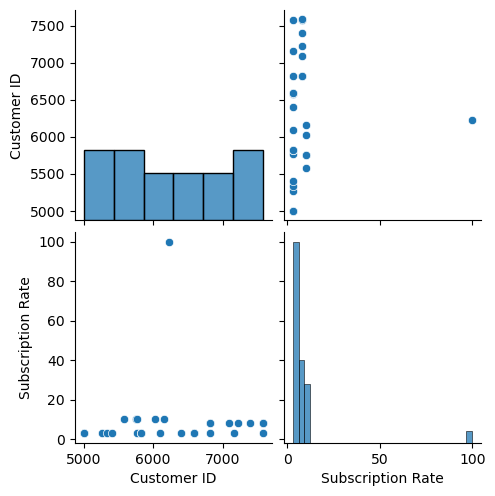

In [106]:
sns.pairplot(customer_data)

In [108]:
customer_data[customer_data['Subscription Rate'] > 50]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium,99.99,No,2023-06-02


In [111]:
customer_data[customer_data['Subscription Plan'] == 'Premium']

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium,9.99,No,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium,9.99,No,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium,9.99,No,NaT
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium,9.99,No,2023-06-02
14,6163,Melody Parks,park.of.melodies@email.com,2023-04-05,Premium,9.99,No,NaT
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium,99.99,No,2023-06-02
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium,7.99,Yes,NaT
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium,7.99,Yes,2023-06-01


In [114]:
customer_data.loc[15,'Subscription Rate'] = 9.99

In [115]:
customer_data[customer_data['Subscription Plan'] == 'Premium']

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium,9.99,No,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium,9.99,No,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium,9.99,No,NaT
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium,9.99,No,2023-06-02
14,6163,Melody Parks,park.of.melodies@email.com,2023-04-05,Premium,9.99,No,NaT
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium,9.99,No,2023-06-02
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium,7.99,Yes,NaT
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium,7.99,Yes,2023-06-01


C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


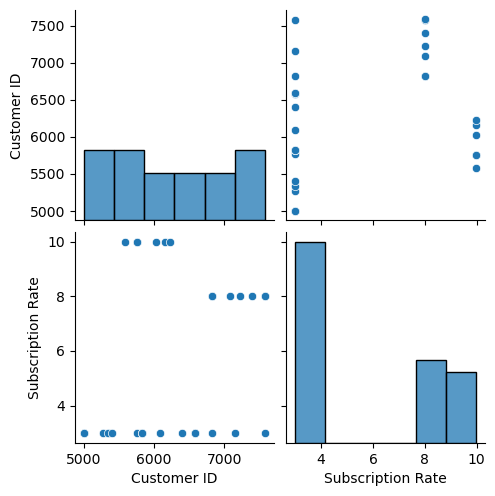

In [116]:
sns.pairplot(customer_data)

In [137]:
pd.get_dummies(customer_data['Cancellation Date'], dtype = 'int')

,2023-06-01,2023-06-02,2023-06-03
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0
5,0,0,1
6,0,0,0
7,0,1,0
8,0,0,0
9,0,0,0


In [128]:
cancel_data = customer_data['Cancellation Date']
cancel_data.value_counts(dropna= False)

Cancellation Date
NaT           17
2023-06-01     6
2023-06-02     5
2023-06-03     2
Name: count, dtype: int64

In [148]:
customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,No_Plan,2.99,No,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,No_Plan,2.99,No,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,No_Plan,2.99,No,NaT
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,No_Plan,2.99,No,2023-06-03
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium,9.99,No,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium,9.99,No,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium,9.99,No,NaT
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic,2.99,No,NaT


In [149]:
customer_data['Is_Cancelled'] = (np.where(customer_data['Cancellation Date'] == pd.to_datetime(customer_data['Cancellation Date']),
                                          1,0))

In [152]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,No_Plan,2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,No_Plan,2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,No_Plan,2.99,No,NaT,0


# EDA

In [ ]:
# How long were customers members before they cancelled?

In [160]:
customer_data.groupby(['Customer ID','Member Since','Cancellation Date']).sum()

,,,Customer Name,Email,Subscription Plan,Subscription Rate,Discount?,Is_Cancelled
Customer ID,Member Since,Cancellation Date,,,,,,
5004,2023-03-13,2023-06-01,Lyric Bell,rhythmical.lyric@email.com,No_Plan,2.99,No,1
5404,2023-03-20,2023-06-03,Jazz Saxton,jazzy.sax@email.com,No_Plan,2.99,No,1
5759,2023-03-22,2023-06-02,Carol Kingbird,songbird.carol@email.com,Premium,9.99,No,1
6029,2023-03-29,2023-06-02,Chord Campbell,campbell.chordify@email.com,Premium,9.99,No,1
6092,2023-04-01,2023-06-01,Benny Beat,rhythmic.benny@email.com,Basic,2.99,No,1
6229,2023-04-06,2023-06-02,Symphony Rhodes,rhodes.symphony@email.com,Premium,9.99,No,1
6588,2023-04-16,2023-06-01,Harmony Bass,bass.harmony@email.com,Basic,2.99,No,1
6824,2023-05-01,2023-06-02,Greta Groove,groovy.greta@email.com,Premium,7.99,Yes,1
7087,2023-05-01,2023-06-02,Harmony Heart,heartfelt.harmony@email.com,Premium,7.99,Yes,1


In [166]:
customer_data['members_since'] = (customer_data['Cancellation Date'] - customer_data['Member Since']).dt.days

In [167]:
customer_data.head(10)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,No_Plan,2.99,No,NaT,0,NaN
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,No_Plan,2.99,No,2023-06-01,1,80.0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT,0,NaN
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,No_Plan,2.99,No,NaT,0,NaN
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,No_Plan,2.99,No,2023-06-03,1,75.0
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium,9.99,No,NaT,0,NaN
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium,9.99,No,2023-06-02,1,72.0
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium,9.99,No,NaT,0,NaN
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic,2.99,No,NaT,0,NaN


In [479]:
mask = (customer_data['Is_Cancelled'] == True) & (customer_data['Discount?'] == 'Yes')
mask2 = (customer_data['Is_Cancelled'] == True) & (customer_data['Discount?'] == 'No')

In [480]:
customer_data[mask]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Session Log In Time,Discount
385,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02,1,32.0,100976,1,103,Song,Sunset Boulevard,Pop,5,2023-05-01 12:03:00,1
386,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02,1,32.0,100976,2,104,Song,Glowing Hearts,Pop,10,2023-05-01 12:03:00,1
387,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02,1,32.0,100976,3,105,Song,Pop Rocks,Pop,52,2023-05-01 12:03:00,1
388,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02,1,32.0,100976,4,102,Song,Unbreakable Beat,Pop,2,2023-05-01 12:03:00,1
389,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium,7.99,Yes,2023-06-02,1,32.0,100976,5,101,Song,Dance All Night,Pop,1,2023-05-01 12:03:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,4,101,Song,Dance All Night,Pop,1,2023-05-16 19:50:00,1
501,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,5,103,Song,Sunset Boulevard,Pop,5,2023-05-16 19:50:00,1
502,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,6,205,Podcast,Investigating Darkness,True Crime,17,2023-05-16 19:50:00,1
503,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium,7.99,Yes,2023-06-01,1,16.0,111057,1,201,Podcast,Jokes on Jokes,Comedy,2,2023-05-17 00:35:00,1


In [481]:
customer_data[mask].Is_Cancelled.sum()

98

In [478]:
percent_of_cancel_with_Discount = (customer_data[mask].Is_Cancelled.sum()/customer_data.Is_Cancelled.sum()) * 100

KeyError: "None of [Index([(False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False)], dtype='object')] are in the [columns]"

In [198]:
per

46.15384615384615

In [193]:
customer_data[mask2]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,No_Plan,2.99,No,2023-06-01,1,80.0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,No_Plan,2.99,No,2023-06-03,1,75.0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium,9.99,No,2023-06-02,1,72.0
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium,9.99,No,2023-06-02,1,65.0
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic,2.99,No,2023-06-01,1,61.0
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium,9.99,No,2023-06-02,1,57.0
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic,2.99,No,2023-06-01,1,46.0


In [199]:
percent_of_cancel_without_Discount = (customer_data[mask2].Is_Cancelled.sum()/customer_data.Is_Cancelled.sum()) * 100

In [200]:
percent_of_cancel_without_Discount

53.84615384615385

C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

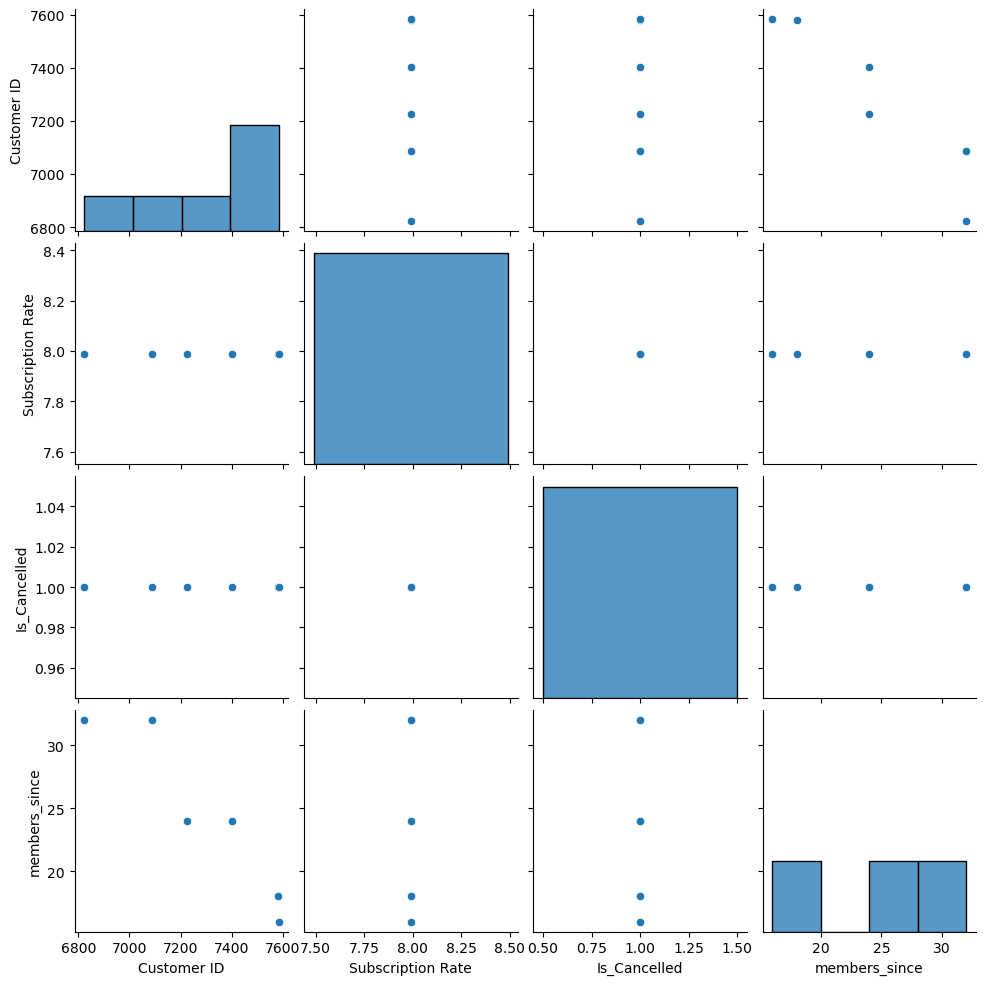

In [202]:
sns.pairplot(customer_data[mask])

all who have cancelled have the same subscription rate with discount
all are 1 month subscription people after 1 month they cancelled.

C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

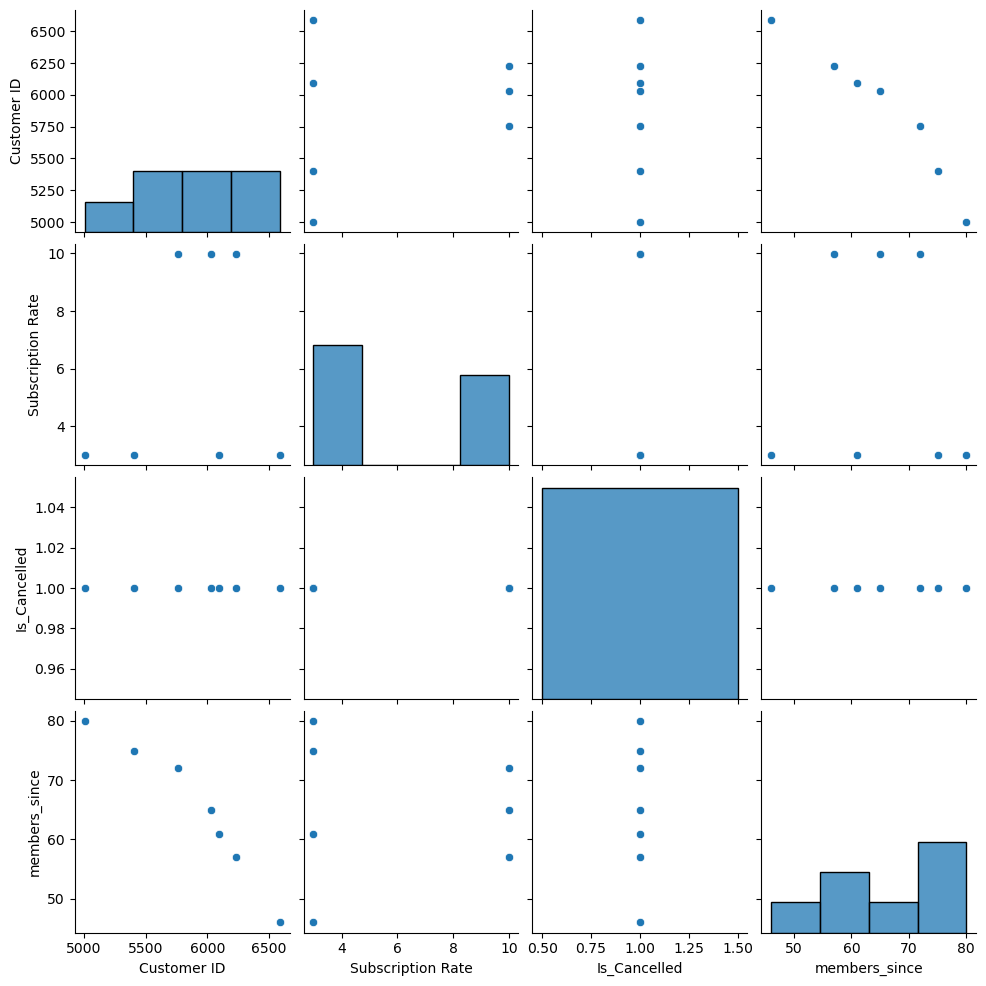

In [203]:
sns.pairplot(customer_data[mask2])

In [ ]:
they have cancelled roughly after using less then 3 months


# Modelling columns 

In [204]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,No_Plan,2.99,No,NaT,0,NaN
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,No_Plan,2.99,No,2023-06-01,1,80.0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT,0,NaN
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,No_Plan,2.99,No,NaT,0,NaN


In [306]:
modedf = customer_data[['Customer ID','Email','Is_Cancelled']]
modedf

,Customer ID,Email,Is_Cancelled
0,5001,harmonious.vibes@email.com,0
1,5001,harmonious.vibes@email.com,0
2,5001,harmonious.vibes@email.com,0
3,5001,harmonious.vibes@email.com,0
4,5001,harmonious.vibes@email.com,0
...,...,...,...
500,7581,keysoflyric@email.com,1
501,7581,keysoflyric@email.com,1
502,7581,keysoflyric@email.com,1
503,7583,melodic.singer@email.com,1


In [215]:
Listining_history

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song
...,...,...,...,...,...
500,7579,111282,4,111,Song
501,6588,111286,1,201,Podcast
502,5763,111333,1,110,Song
503,5763,111333,2,108,Song


In [232]:
Audio_Data2  = Audio_data.ID.str.split('-',expand= True).rename(columns= {0: 'Audio Type', 1:'Audio ID'})
Audio_Data2

,Audio Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105
5,Song,106
6,Song,107
7,Song,108
8,Song,109
9,Song,110


In [233]:
Audio_data = pd.concat([Audio_data,Audio_Data2],axis = 1)
Audio_data

,ID,Name,Genre,Popularity,Audio Type,Audio ID
0,Song-101,Dance All Night,Pop,1,Song,101
1,Song-102,Unbreakable Beat,Pop,2,Song,102
2,Song-103,Sunset Boulevard,Pop Music,5,Song,103
3,Song-104,Glowing Hearts,Pop Music,10,Song,104
4,Song-105,Pop Rocks,Pop Music,52,Song,105
5,Song-106,My Old Dog and My True Love,Country,23,Song,106
6,Song-107,Dirt Road Romance,Country,30,Song,107
7,Song-108,Chase the Dream,Hip Hop,4,Song,108
8,Song-109,Rise Above,Hip Hop,9,Song,109
9,Song-110,Boss Moves,Hip Hop,28,Song,110


In [226]:
Audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
 4   Audio Type  17 non-null     object
 5   Audio ID    17 non-null     object
 6   Audio Type  17 non-null     object
 7   Audio ID    17 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.2+ KB


In [227]:
Listining_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [231]:
Audio_data.drop(['Audio ID','Audio Type'], axis= 1, inplace= True)

In [234]:
Audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
 4   Audio Type  17 non-null     object
 5   Audio ID    17 non-null     object
dtypes: int64(1), object(5)
memory usage: 948.0+ bytes


In [235]:
Audio_data.drop('ID', inplace=True, axis = 1)

In [236]:
Audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        17 non-null     object
 1   Genre       17 non-null     object
 2   Popularity  17 non-null     int64 
 3   Audio Type  17 non-null     object
 4   Audio ID    17 non-null     object
dtypes: int64(1), object(4)
memory usage: 812.0+ bytes


In [237]:
Audio_data['Audio ID'] =  Audio_data['Audio ID'].astype('int32')

In [238]:
Audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        17 non-null     object
 1   Genre       17 non-null     object
 2   Popularity  17 non-null     int64 
 3   Audio Type  17 non-null     object
 4   Audio ID    17 non-null     int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 744.0+ bytes


In [240]:
Total_Audio_Listen_History = Listining_history.merge(Audio_data,
                        'left',
                        'Audio ID')

In [241]:
Total_Audio_Listen_History

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Audio Type_y
0,5001,100520,1,101,Song,Dance All Night,Pop,1,Song
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2,Song
2,5001,100520,3,103,Song,Sunset Boulevard,Pop Music,5,Song
3,5001,100520,4,104,Song,Glowing Hearts,Pop Music,10,Song
4,5001,100520,5,105,Song,Pop Rocks,Pop Music,52,Song
...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Moonlit Serenade,Jazz,63,Song
501,6588,111286,1,201,Podcast,Jokes on Jokes,Comedy,2,Podcast
502,5763,111333,1,110,Song,Boss Moves,Hip Hop,28,Song
503,5763,111333,2,108,Song,Chase the Dream,Hip Hop,4,Song


In [244]:
Total_Audio_Listen_History.drop('Audio Type_y', inplace= True, axis=1)

In [245]:
Total_Audio_Listen_History

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Pop Rocks,Pop Music,52
...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Chase the Dream,Hip Hop,4


In [248]:
Session_History = Total_Audio_Listen_History.merge(Session_data,
                                                   'left',
                                                   'Session ID')
                                                   

In [251]:
Session_data.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [249]:
Session_History

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Session Log In Time
0,5001,100520,1,101,Song,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,100520,3,103,Song,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00
3,5001,100520,4,104,Song,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00
4,5001,100520,5,105,Song,Pop Rocks,Pop Music,52,2023-03-13 18:29:00
...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Moonlit Serenade,Jazz,63,2023-05-23 23:51:00
501,6588,111286,1,201,Podcast,Jokes on Jokes,Comedy,2,2023-05-27 02:15:00
502,5763,111333,1,110,Song,Boss Moves,Hip Hop,28,2023-05-27 20:46:00
503,5763,111333,2,108,Song,Chase the Dream,Hip Hop,4,2023-05-27 20:46:00


In [345]:
Listining_session = Session_History.groupby(['Customer ID'])[['Session Log In Time']].count().sort_values('Session Log In Time', ascending = False)
Listining_session

,Session Log In Time
Customer ID,
5001,60
5267,45
6824,31
5763,31
7224,29
6584,27
5002,22
6586,22
6821,21


In [272]:
Session_History.groupby(['Genre'])[['Session ID']].count().sort_values('Session ID', ascending = False).head(20)

,Session ID
Genre,
Pop Music,167
Pop,100
Hip Hop,88
Country,68
Jazz,48
Comedy,19
True Crime,15


Modelling Machine learing 

In [276]:
customer_data = customer_data.merge(Session_History,
                    'left',
                    'Customer ID')
                    

In [277]:
customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Session Log In Time
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,1,101,Song,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,2,102,Song,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,3,103,Song,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,4,104,Song,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,5,105,Song,Pop Rocks,Pop Music,52,2023-03-13 18:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,4,101,Song,Dance All Night,Pop,1,2023-05-16 19:50:00
501,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,5,103,Song,Sunset Boulevard,Pop Music,5,2023-05-16 19:50:00
502,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,6,205,Podcast,Investigating Darkness,True Crime,17,2023-05-16 19:50:00
503,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium,7.99,Yes,2023-06-01,1,16.0,111057,1,201,Podcast,Jokes on Jokes,Comedy,2,2023-05-17 00:35:00


In [282]:
Discount = pd.get_dummies(customer_data['Discount?'], dtype= 'int', drop_first= True).rename(columns = {'Yes': 'Discount'})
Discount

,Discount
0,0
1,0
2,0
3,0
4,0
...,...
500,1
501,1
502,1
503,1


In [293]:
customer_data = pd.concat([customer_data,Discount], axis = 1)

In [294]:
customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Session Log In Time,Discount
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,1,101,Song,Dance All Night,Pop,1,2023-03-13 18:29:00,0
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,2,102,Song,Unbreakable Beat,Pop,2,2023-03-13 18:29:00,0
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,3,103,Song,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00,0
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,4,104,Song,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00,0
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,5,105,Song,Pop Rocks,Pop Music,52,2023-03-13 18:29:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,4,101,Song,Dance All Night,Pop,1,2023-05-16 19:50:00,1
501,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,5,103,Song,Sunset Boulevard,Pop Music,5,2023-05-16 19:50:00,1
502,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,6,205,Podcast,Investigating Darkness,True Crime,17,2023-05-16 19:50:00,1
503,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium,7.99,Yes,2023-06-01,1,16.0,111057,1,201,Podcast,Jokes on Jokes,Comedy,2,2023-05-17 00:35:00,1


In [299]:
customer_data.groupby(['Customer ID'])['Discount'].sum()

Customer ID
5001     0
5002     0
5004     0
5267     0
5338     0
5404     0
5581     0
5759     0
5761     0
5763     0
5826     0
5827     0
6029     0
6092     0
6163     0
6229     0
6406     0
6584     0
6586     0
6588     0
6821     0
6822    15
6824    31
7087    11
7158     0
7224    29
7401    11
7579     0
7581    14
7583     2
Name: Discount, dtype: int32

In [300]:
new_customer_data = pd.read_csv('maven_music_customers.csv')
new_customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),$9.99,NaN,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),$9.99,NaN,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),$9.99,NaN,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,3/28/23,Basic (Ads),$2.99,NaN,NaN


In [303]:
Discount_Var = pd.get_dummies(new_customer_data['Discount?'], dtype = 'int').rename(columns= {'Yes':'Discount_Var'})
Discount_Var

,Discount_Var
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [308]:
modedf

,Customer ID,Email,Is_Cancelled
0,5001,harmonious.vibes@email.com,0
1,5001,harmonious.vibes@email.com,0
2,5001,harmonious.vibes@email.com,0
3,5001,harmonious.vibes@email.com,0
4,5001,harmonious.vibes@email.com,0
...,...,...,...
500,7581,keysoflyric@email.com,1
501,7581,keysoflyric@email.com,1
502,7581,keysoflyric@email.com,1
503,7583,melodic.singer@email.com,1


In [313]:
eda_model = new_customer_data[['Customer ID']]
eda_model

,Customer ID
0,5001
1,5002
2,5004
3,5267
4,5338
5,5404
6,5581
7,5759
8,5761
9,5763


In [327]:
eda_model = pd.concat([eda_model,Discount_Var], axis = 1)
eda_model.drop('Discount_Var', inplace=True, axis = 1)

In [329]:
eda_model = pd.concat([eda_model,Discount_Var], axis = 1)
eda_model

,Customer ID,Discount_Var
0,5001,0
1,5002,0
2,5004,0
3,5267,0
4,5338,0
5,5404,0
6,5581,0
7,5759,0
8,5761,0
9,5763,0


In [330]:
customer_data

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Session Log In Time,Discount
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,1,101,Song,Dance All Night,Pop,1,2023-03-13 18:29:00,0
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,2,102,Song,Unbreakable Beat,Pop,2,2023-03-13 18:29:00,0
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,3,103,Song,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00,0
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,4,104,Song,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00,0
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,5,105,Song,Pop Rocks,Pop Music,52,2023-03-13 18:29:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,4,101,Song,Dance All Night,Pop,1,2023-05-16 19:50:00,1
501,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,5,103,Song,Sunset Boulevard,Pop Music,5,2023-05-16 19:50:00,1
502,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium,7.99,Yes,2023-06-03,1,18.0,110113,6,205,Podcast,Investigating Darkness,True Crime,17,2023-05-16 19:50:00,1
503,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium,7.99,Yes,2023-06-01,1,16.0,111057,1,201,Podcast,Jokes on Jokes,Comedy,2,2023-05-17 00:35:00,1


In [338]:
can_data = customer_data.groupby(['Customer ID'], as_index= False)[['Is_Cancelled']].sum()
can_data

,Customer ID,Is_Cancelled
0,5001,0
1,5002,0
2,5004,9
3,5267,0
4,5338,0
5,5404,8
6,5581,0
7,5759,15
8,5761,0
9,5763,0


In [339]:
can_data['Is_Cancelled']  = np.where(can_data['Is_Cancelled'] > 1, 1,can_data['Is_Cancelled'])

In [340]:
can_data

,Customer ID,Is_Cancelled
0,5001,0
1,5002,0
2,5004,1
3,5267,0
4,5338,0
5,5404,1
6,5581,0
7,5759,1
8,5761,0
9,5763,0


In [343]:
eda_model = eda_model.merge(can_data,
                            'left',
                            'Customer ID')
                            

In [344]:
eda_model

,Customer ID,Discount_Var,Is_Cancelled
0,5001,0,0
1,5002,0,0
2,5004,0,1
3,5267,0,0
4,5338,0,0
5,5404,0,1
6,5581,0,0
7,5759,0,1
8,5761,0,0
9,5763,0,0


In [346]:
eda_model= eda_model.merge(Listining_session,
                           'left',
                           'Customer ID')
                           

In [347]:
eda_model

,Customer ID,Discount_Var,Is_Cancelled,Session Log In Time
0,5001,0,0,60
1,5002,0,0,22
2,5004,0,1,9
3,5267,0,0,45
4,5338,0,0,18
5,5404,0,1,8
6,5581,0,0,5
7,5759,0,1,15
8,5761,0,0,5
9,5763,0,0,31


In [348]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Is_Cancelled,members_since,Session ID,Audio Order,Audio ID,Audio Type_x,Name,Genre,Popularity,Session Log In Time,Discount
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,1,101,Song,Dance All Night,Pop,1,2023-03-13 18:29:00,0
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,2,102,Song,Unbreakable Beat,Pop,2,2023-03-13 18:29:00,0
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,3,103,Song,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00,0
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,4,104,Song,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00,0
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,0,NaN,100520,5,105,Song,Pop Rocks,Pop Music,52,2023-03-13 18:29:00,0


In [421]:
pop_data = customer_data.groupby(['Customer ID','Genre'])[['Session ID']].count()
pop_data

Session ID
Customer ID Genre                 
5001        Hip Hop             26
            Pop                 34
5002        Country             22
5004        Pop                  9
5267        Hip Hop             22
            Pop                 23
5338        Country             18
5404        Pop                  8
5581        True Crime           5
5759        Pop                 15
5761        True Crime           5
5763        Hip Hop             11
            Pop                 20
5826        Country             17
5827        Pop                  7
6029        Pop                 12
6092        Comedy               4
            Hip Hop              3
            Pop                  3
6163        True Crime           4
6229        Pop                 13
6406        Comedy               4
            Hip Hop              2
            Pop                  3
6584        Country              4
            Hip Hop              6
            Jazz                 4
            Pop                 13
6586        Country              4
            Hip Hop              4
            Jazz                 4
            Pop                 10
6588        Comedy               3
            Hip Hop              3
            Pop                  4
6821        Country              3
            Hip Hop              5
            Jazz                 3
            Pop                 10
6822        Jazz                15
6824        Pop                 31
7087        Comedy               3
            Hip Hop              3
            Pop                  5
7158        Jazz                13
7224        Pop                 29
7401        Comedy               3
            Hip Hop              3
            Pop                  5
7579        Jazz                 9
7581        Pop                 13
            True Crime           1
7583        Comedy               2

In [368]:
Total_Sessions = pop_data['Session ID'].sum()
Total_Sessions

505

In [388]:
Pop_Sessions = pop_data[(pop_data.Genre == ('Pop')) | (pop_data.Genre == ('Pop Music'))].sum().iloc[2:]
Pop_Sessions

Session ID    267
dtype: object

In [389]:
popPercent = (267/505) *100
popPercent

52.87128712871287

In [390]:
pop_data.Genre.value_counts()

Genre
Pop           20
Pop Music     20
Hip Hop       11
Country        6
Comedy         6
Jazz           6
True Crime     4
Name: count, dtype: int64

In [393]:
customer_data['Audio Type_x'].value_counts()

Audio Type_x
Song       463
Podcast     42
Name: count, dtype: int64

In [394]:
podPercent = (42/505) *100
podPercent

8.316831683168317

In [416]:
customer_data.Genre = customer_data.Genre.str.strip(' Music')

In [434]:
Pop_Percent = ((customer_data[customer_data.Genre =='Pop'].groupby('Customer ID')['Session Log In Time'].count()/267)
                .mul(100).round(2).reset_index())
Pop_Percent

,Customer ID,Session Log In Time
0,5001,12.73
1,5004,3.37
2,5267,8.61
3,5404,3.00
4,5759,5.62
5,5763,7.49
6,5827,2.62
7,6029,4.49
8,6092,1.12
9,6229,4.87


In [435]:
eda_model= eda_model.merge(Pop_Percent,
                           'left',
                           'Customer ID')
                           

In [436]:
eda_model.rename(columns= {'Session Log In Time_x':'No_of_Session', 'Session Log In Time_y':'Pop_Percent'},inplace= True)

In [437]:
eda_model

,Customer ID,Discount_Var,Is_Cancelled,No_of_Sessions,Pop_Percent,Session Log In Time
0,5001,0,0,60,12.73,12.73
1,5002,0,0,22,NaN,NaN
2,5004,0,1,9,3.37,3.37
3,5267,0,0,45,8.61,8.61
4,5338,0,0,18,NaN,NaN
5,5404,0,1,8,3.00,3.00
6,5581,0,0,5,NaN,NaN
7,5759,0,1,15,5.62,5.62
8,5761,0,0,5,NaN,NaN
9,5763,0,0,31,7.49,7.49


In [445]:
Podcast_Percent = Pop_Percent = ((customer_data[customer_data['Audio Type_x'] =='Podcast'].groupby('Customer ID')['Session Log In Time'].count()/42)
                .mul(100).round(2).reset_index())
Podcast_Percent

,Customer ID,Session Log In Time
0,5581,11.90
1,5761,11.90
2,6092,16.67
3,6163,9.52
4,6406,16.67
5,6588,11.90
6,7087,7.14
7,7401,7.14
8,7581,2.38
9,7583,4.76


In [446]:
eda_model = eda_model.merge(Podcast_Percent,
                            'left',
                             'Customer ID')

In [449]:
eda_model.rename(columns={'Session Log In Time_y':'Pod_Cast_Percent'}, inplace=True)

In [451]:
eda_model.drop('Session Log In Time_x', inplace= True, axis =1)

In [453]:
eda_model.fillna(0)

,Customer ID,Discount_Var,Is_Cancelled,No_of_Sessions,Pop_Percent,Pod_Cast_Percent
0,5001,0,0,60,12.73,0.00
1,5002,0,0,22,0.00,0.00
2,5004,0,1,9,3.37,0.00
3,5267,0,0,45,8.61,0.00
4,5338,0,0,18,0.00,0.00
5,5404,0,1,8,3.00,0.00
6,5581,0,0,5,0.00,11.90
7,5759,0,1,15,5.62,0.00
8,5761,0,0,5,0.00,11.90
9,5763,0,0,31,7.49,0.00


C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

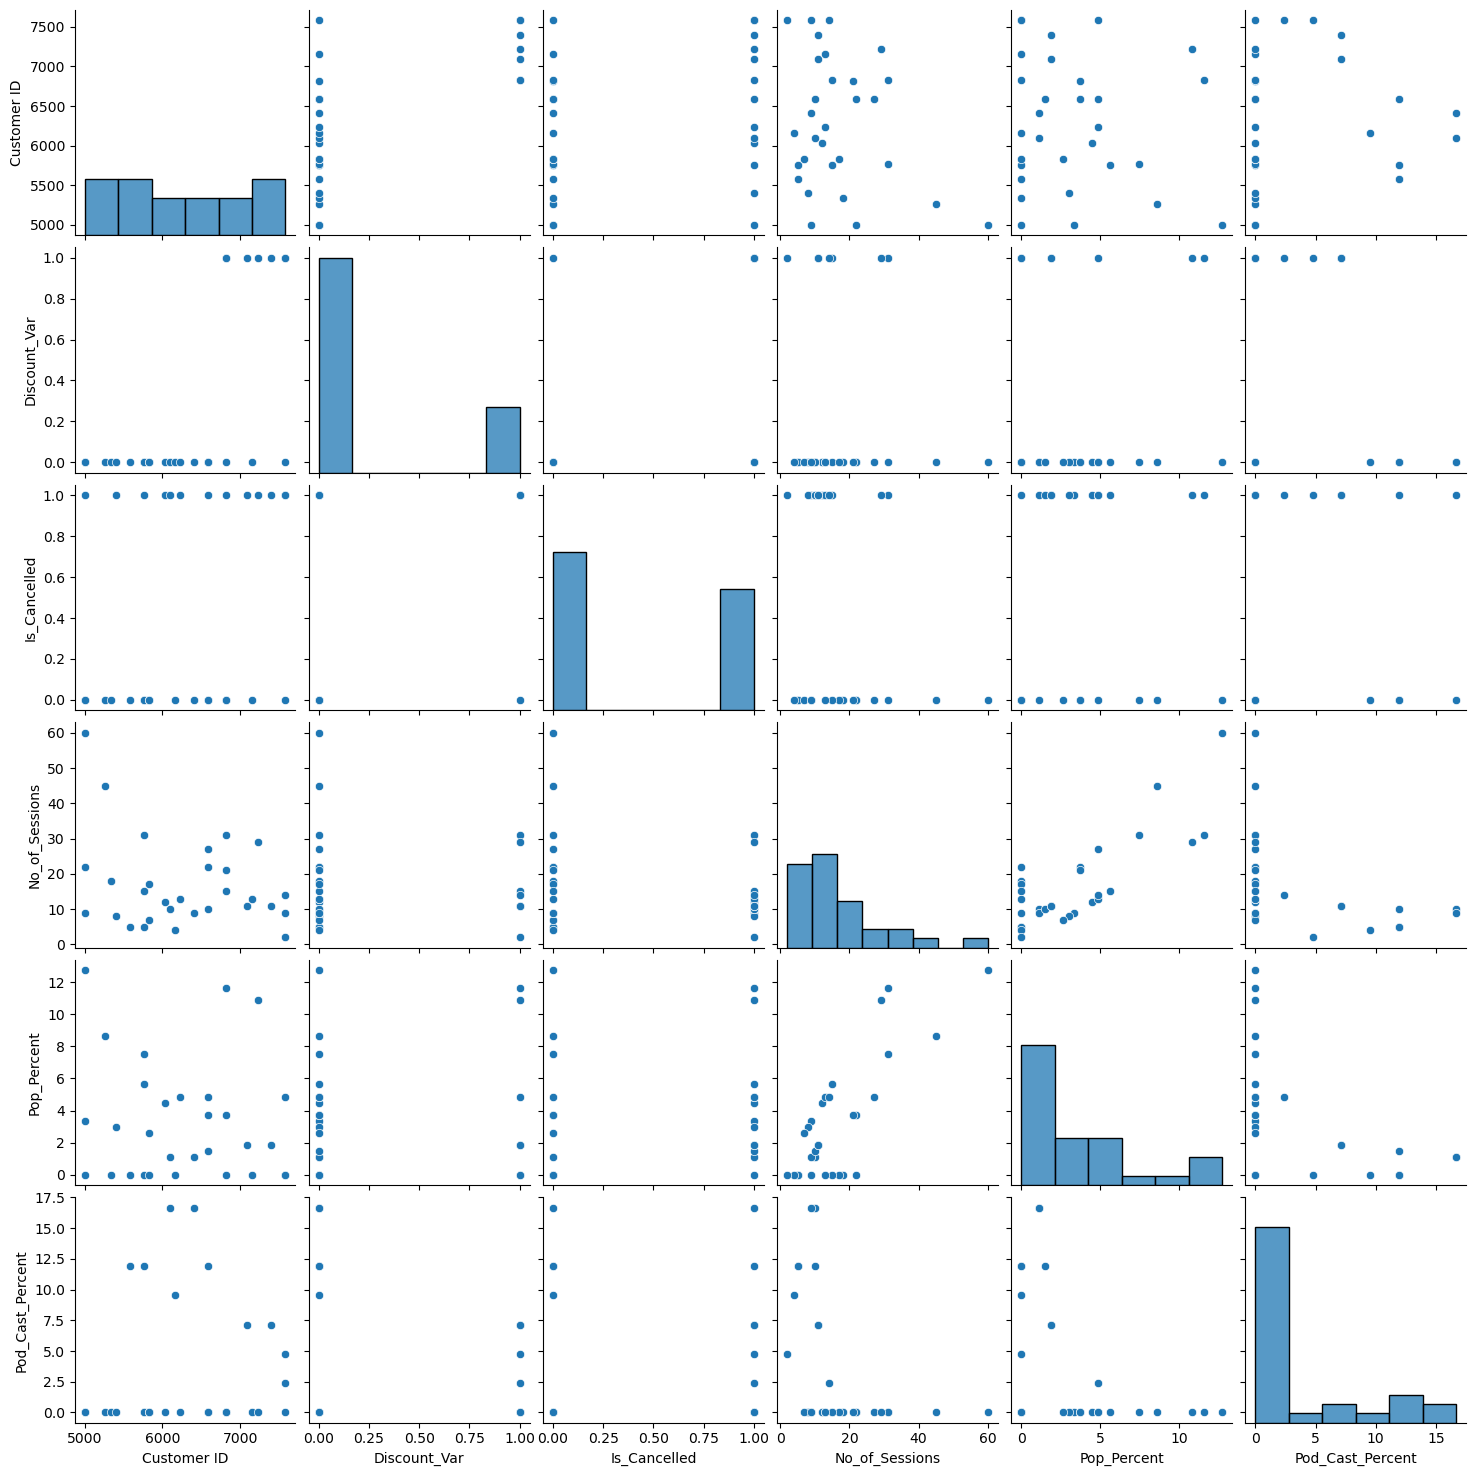

In [454]:
sns.pairplot(eda_model.fillna(0))

In [ ]:
sessions are below 30


In [ ]:
no of sessions 
pop percent is less tend to cancel
no of sessions are less


C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Is_Cancelled', ylabel='Pop_Percent'>

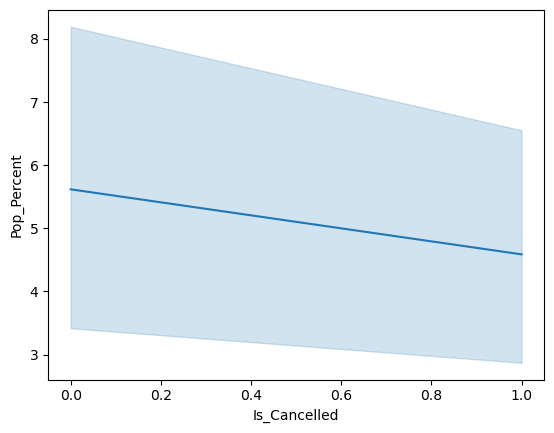

In [460]:
sns.lineplot(y = eda_model.Pop_Percent, x = eda_model.Is_Cancelled)

<Axes: xlabel='Discount_Var', ylabel='Is_Cancelled'>

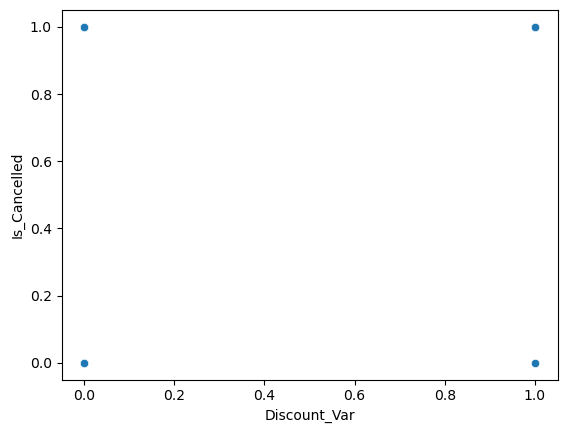

In [461]:
sns.scatterplot(x = eda_model.Discount_Var, y = eda_model.Is_Cancelled)

C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='No_of_Sessions', ylabel='Is_Cancelled'>

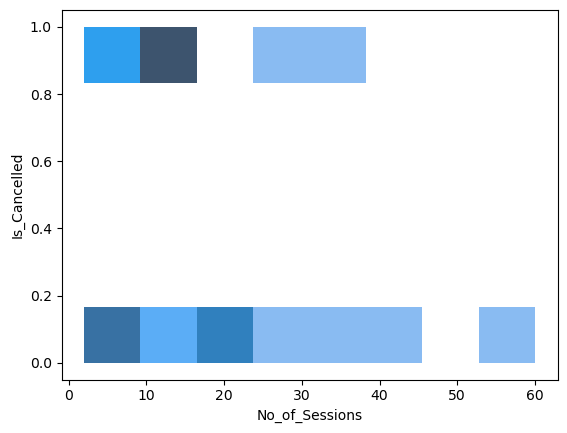

In [464]:
sns.histplot(x= eda_model.No_of_Sessions, y= eda_model.Is_Cancelled)

<Axes: xlabel='Pop_Percent', ylabel='No_of_Sessions'>

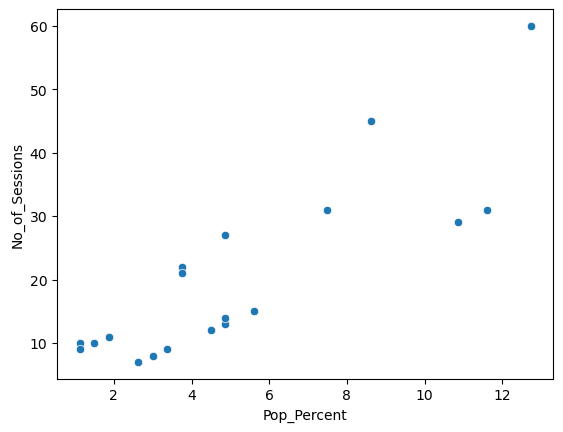

In [466]:
sns.scatterplot(x= eda_model.Pop_Percent, y = eda_model.No_of_Sessions)

In [469]:
customer_data[['Subscription Rate','Subscription Plan']].value_counts()

Subscription Rate  Subscription Plan
2.99               Basic                274
7.99               Premium              113
2.99               No_Plan               64
9.99               Premium               54
Name: count, dtype: int64

In [474]:
customer_data['Subscription Plan']  = np.where(customer_data['Subscription Plan'] == 'No_Plan', 'Basic',customer_data['Subscription Plan'])

In [475]:
customer_data['Subscription Plan'].value_counts()

Subscription Plan
Basic      338
Premium    167
Name: count, dtype: int64

C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KishoreKiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

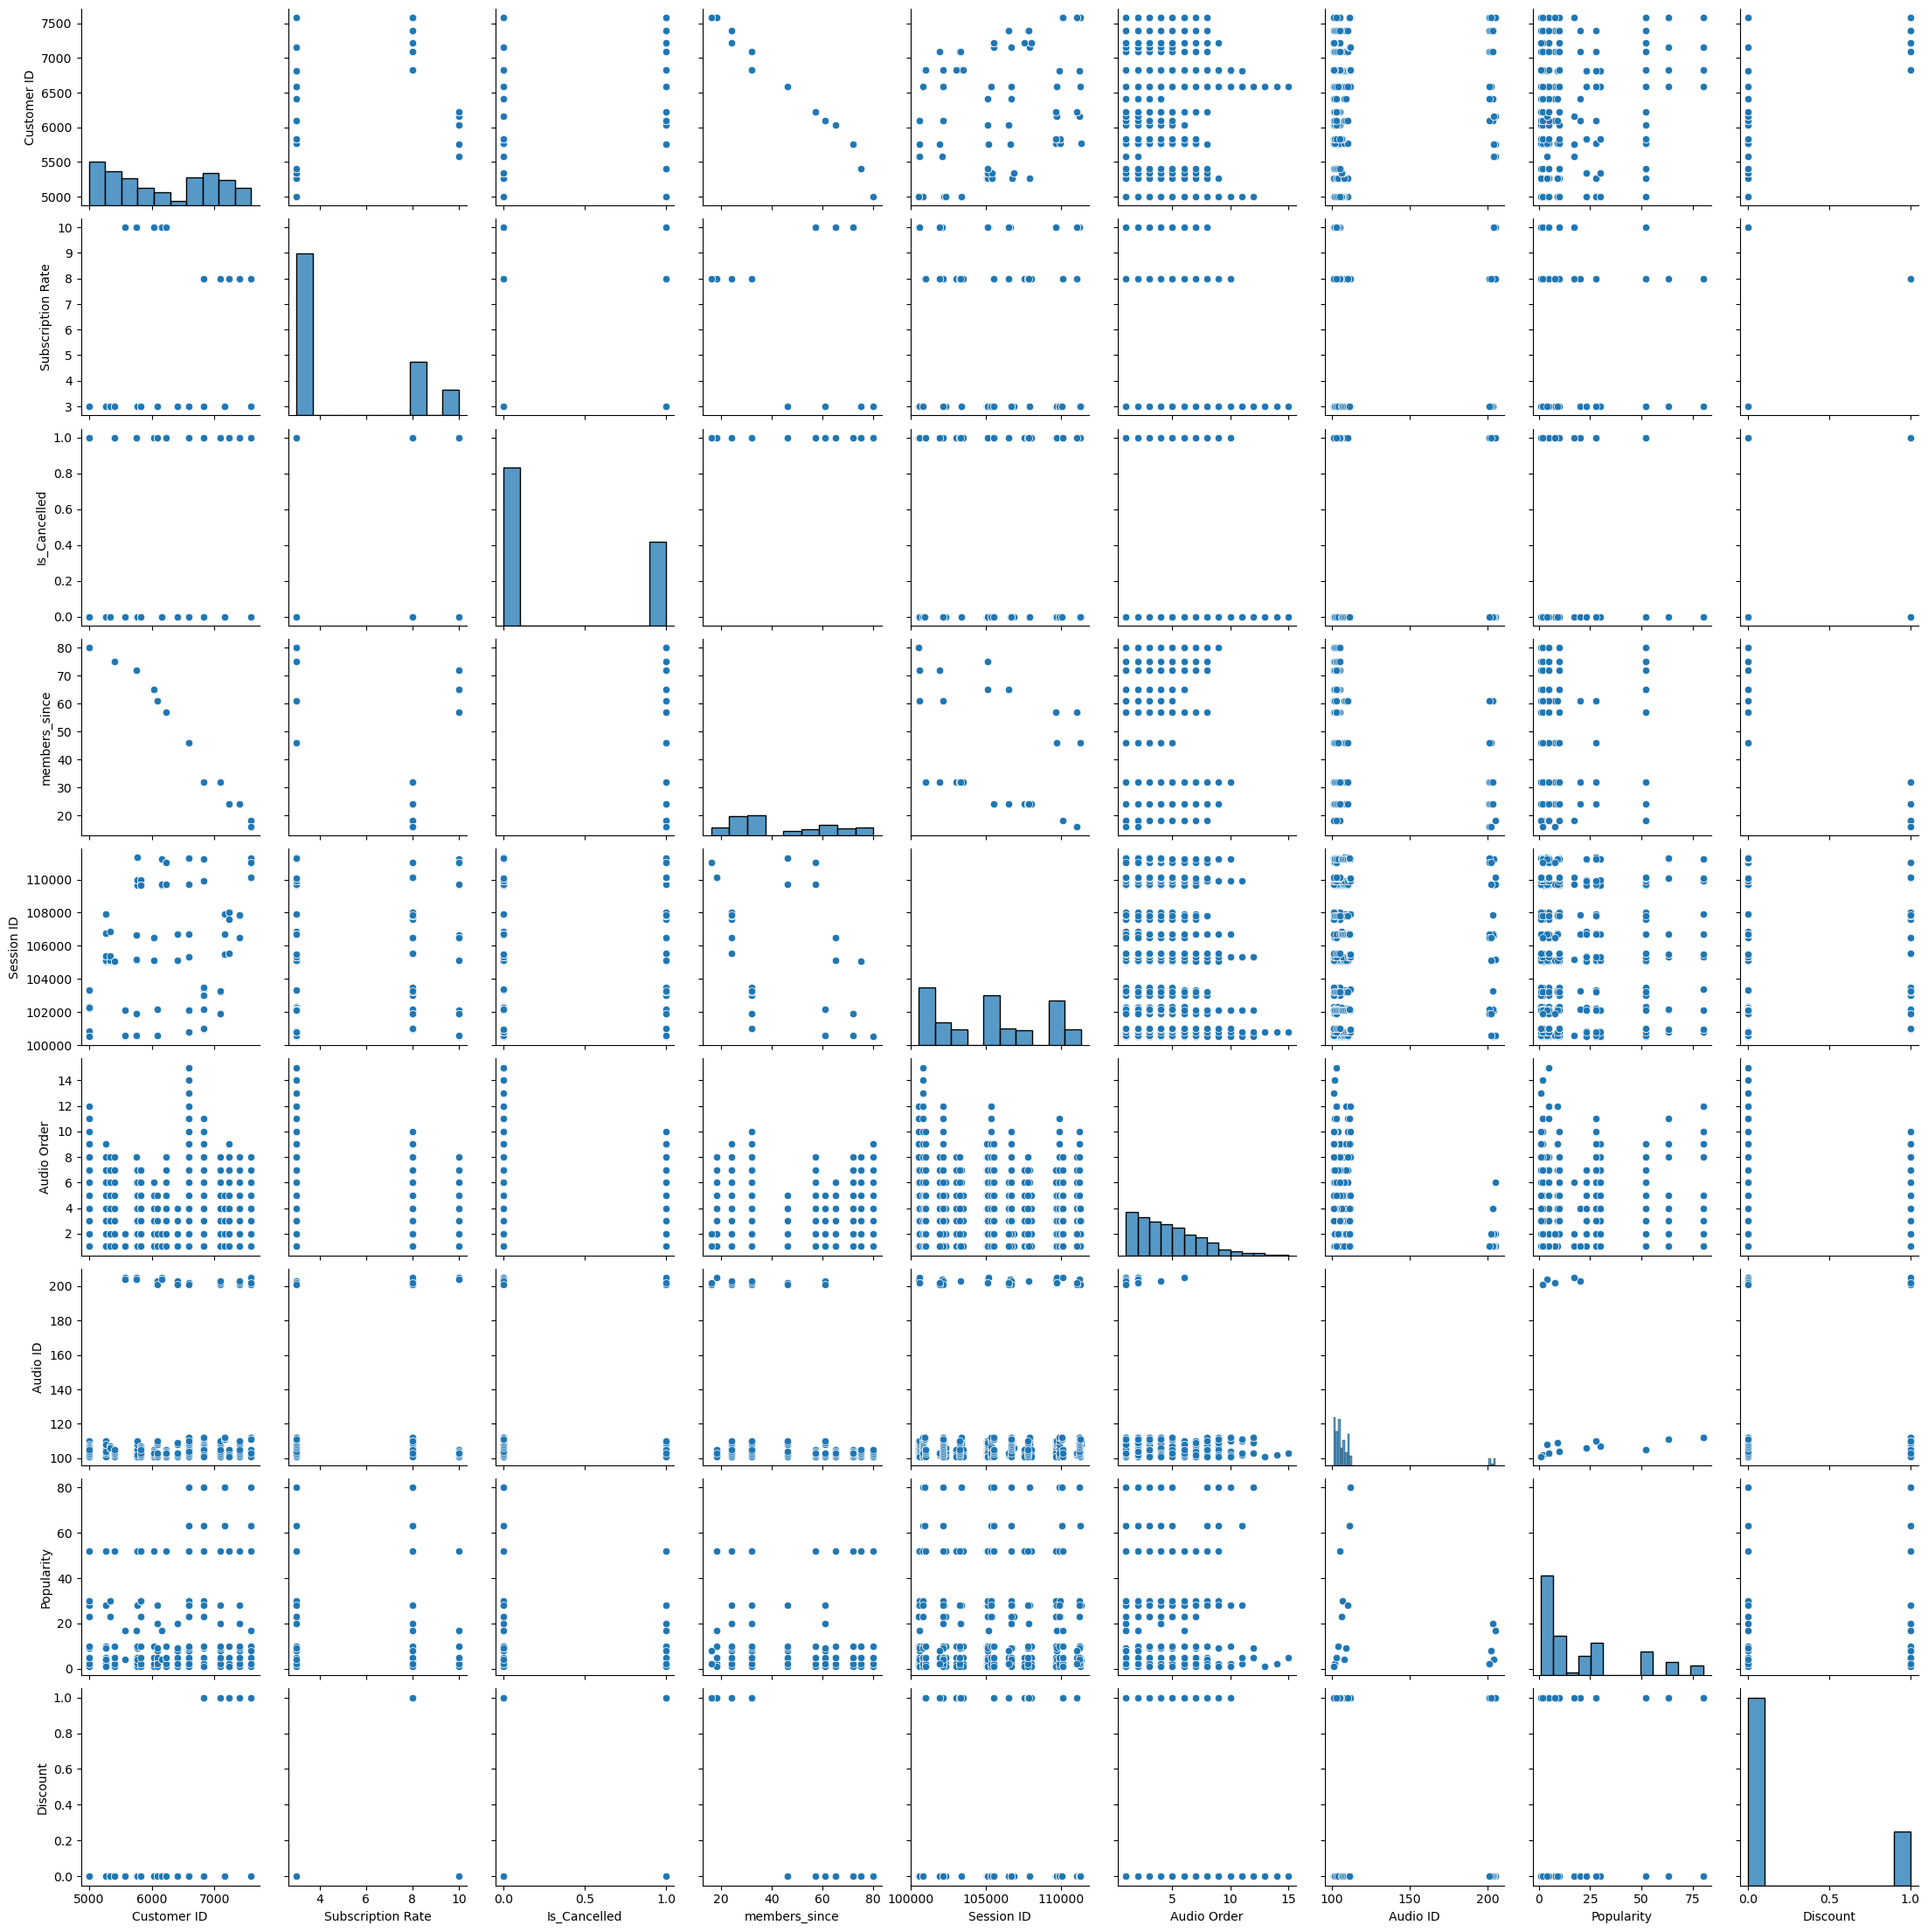

In [476]:
sns.pairplot(customer_data)